In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('E:\Dataset2\Cicids2017\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv('E:\Dataset2\Cicids2017\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df3 = pd.read_csv('E:\Dataset2\Cicids2017\\Friday-WorkingHours-Morning.pcap_ISCX.csv')
df4 = pd.read_csv('E:\Dataset2\Cicids2017\\Monday-WorkingHours.pcap_ISCX.csv')
df5 = pd.read_csv('E:\Dataset2\Cicids2017\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6 = pd.read_csv('E:\Dataset2\Cicids2017\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df7 = pd.read_csv('E:\Dataset2\Cicids2017\\Tuesday-WorkingHours.pcap_ISCX.csv')
df8 = pd.read_csv('E:\Dataset2\Cicids2017\\Wednesday-workingHours.pcap_ISCX.csv')

In [3]:
df= pd.concat([df1, df2,df3,df4,df5,df6,df7,df8])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BENIGN'),
  Text(1, 0, 'DDoS'),
  Text(2, 0, 'PortScan'),
  Text(3, 0, 'Bot'),
  Text(4, 0, 'Infiltration'),
  Text(5, 0, 'Web Attack � Brute Force'),
  Text(6, 0, 'Web Attack � XSS'),
  Text(7, 0, 'Web Attack � Sql Injection'),
  Text(8, 0, 'FTP-Patator'),
  Text(9, 0, 'SSH-Patator'),
  Text(10, 0, 'DoS slowloris'),
  Text(11, 0, 'DoS Slowhttptest'),
  Text(12, 0, 'DoS Hulk'),
  Text(13, 0, 'DoS GoldenEye'),
  Text(14, 0, 'Heartbleed')])

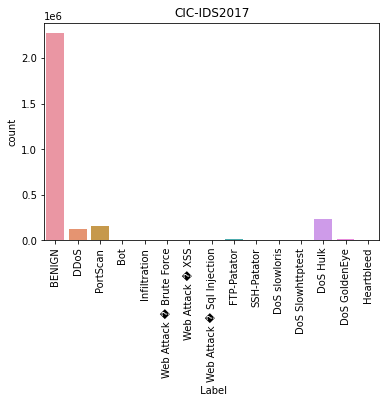

In [4]:
sns.countplot(x = " Label", data = df).set(title='CIC-IDS2017')
df[" Label"].value_counts()
plt.xticks(rotation=90)

In [5]:
df.shape
df.duplicated().sum()

308381

In [6]:
df =  df.drop_duplicates(keep="first")

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s             353
 Destination Port          0
 Bwd Avg Bytes/Bulk        0
 Fwd Avg Packets/Bulk      0
Fwd Avg Bytes/Bulk         0
                        ... 
 Bwd IAT Mean              0
Bwd IAT Total              0
 Fwd IAT Min               0
 Fwd IAT Max               0
 Label                     0
Length: 79, dtype: int64

In [9]:
df.isna().mean()*100

 Destination Port              0.0
 Flow Duration                 0.0
 Total Fwd Packets             0.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
 Label                         0.0
Length: 79, dtype: float64

In [10]:
df.dropna(axis=0,inplace=True,how="any")

In [11]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()

BENIGN           2096134
DoS Hulk          172846
DDoS              128016
PortScan           90819
DoS GoldenEye      10286
Name:  Label, dtype: int64

In [12]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [13]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [14]:
df = df.replace(0, np.nan)

In [15]:
df.dropna(how = "all", axis =1,inplace = True )
df.fillna(0, inplace = True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865.0,3,2,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109,1,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52,1,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34,1,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3,2,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [16]:
df.dropna(how = "all", axis =0,inplace = True )
df.shape

(2496897, 71)

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(df)


In [17]:
df = df.drop([' Total Backward Packets',' Total Length of Bwd Packets',' Fwd Packet Length Mean',' Fwd Packet Length Std'],axis = 1)
df =df.drop([' Bwd Packet Length Mean',' Bwd Packet Length Std',' Flow IAT Std',' Flow IAT Max','Fwd IAT Total',' Fwd IAT Mean'],axis=1)
df =df.drop([' Fwd IAT Std',' Fwd IAT Max',' Bwd IAT Mean',' Bwd IAT Max',' Bwd IAT Min',' Fwd Header Length'],axis= 1)
df =df.drop([' Bwd Header Length','Fwd Packets/s',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance'],axis=1)
df =df.drop([' SYN Flag Count',' ECE Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size'],axis=1)
df =df.drop([' Fwd Header Length.1','Subflow Fwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Packets'],axis=1)
df =df.drop([' Subflow Bwd Bytes',' act_data_pkt_fwd',' Active Max',' Active Min','Idle Mean'],axis=1)
df =df.drop([' Idle Max',' Idle Min'],axis=1)

In [18]:
X = df.drop([' Label'], axis=1)
y = df[' Label']

In [19]:
X.shape

(2496897, 32)

In [22]:
y.value_counts()

BENIGN           2095057
DoS Hulk          172846
DDoS              128014
PortScan           90694
DoS GoldenEye      10286
Name:  Label, dtype: int64

In [23]:
def targetify(x):
    if x == 'BENIGN':
        return 0
    else:
        return 1

In [24]:
labels = df[' Label']    #For multiclass classification
df['Target']=df[' Label'].apply(targetify)
y = df['Target']

In [25]:
y.value_counts()

0    2095057
1     401840
Name: Target, dtype: int64

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=2)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
classifier_obj = KNeighborsClassifier(n_neighbors=15)
classifier_obj.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [54]:
y_pred=classifier_obj.predict(x_test)

AttributeError: 'NoneType' object has no attribute 'split'

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,average_precision_score
from sklearn.metrics import accuracy_score

In [30]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train);
preds_dc = dc.predict(x_test)
score_dc = accuracy_score(preds_dc,y_test)
score_dc

0.9987891652315538

In [31]:
print(classification_report(y_test, preds_dc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628862
           1       1.00      1.00      1.00    120208

    accuracy                           1.00    749070
   macro avg       1.00      1.00      1.00    749070
weighted avg       1.00      1.00      1.00    749070



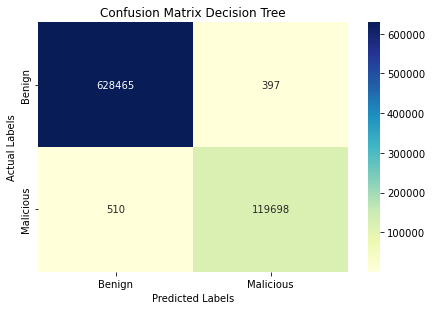

In [32]:
labels = ["Benign", "Malicious"]

# Compute the confusion matrix
cm = confusion_matrix(y_test, preds_dc)

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix Decision Tree")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [33]:
result_DT=accuracy_score(preds_dc,y_test)
result_DT

0.9987891652315538

In [34]:
import time

In [35]:
start_time = time.time()
dc.fit(x_train, y_train.values.ravel())
end_time = time.time()

In [36]:
print("Training time: ",end_time-start_time)

Training time:  46.39274477958679


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =15, random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [38]:
y_Rpred=rf.predict(x_test)

In [39]:
result_Rf=accuracy_score(y_Rpred,y_test)
result_Rf

0.9989747286635428

In [40]:
print(classification_report(y_test, y_Rpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628862
           1       1.00      1.00      1.00    120208

    accuracy                           1.00    749070
   macro avg       1.00      1.00      1.00    749070
weighted avg       1.00      1.00      1.00    749070



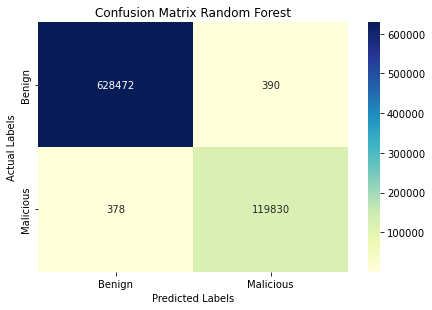

In [41]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_Rpred)
labels = ["Benign", "Malicious"]

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix Random Forest")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [42]:
start_time = time.time()
rf.fit(x_train, y_train.values.ravel())
end_time = time.time()

In [43]:
print("Training time: ",end_time-start_time)

Training time:  80.74903845787048


In [60]:
from xgboost import XGBClassifier
xgbclassifier = XGBClassifier(max_depth=5, n_estimators =30, learning_rate =1.0)
xgbclassifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
y_Xpred=xgbclassifier.predict(x_test)

In [62]:
result_xg=accuracy_score(y_Xpred,y_test)
result_xg

0.9716288197364732

In [63]:
print(classification_report(y_test, y_Xpred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    628862
           1       0.97      0.85      0.91    120208

    accuracy                           0.97    749070
   macro avg       0.97      0.92      0.94    749070
weighted avg       0.97      0.97      0.97    749070



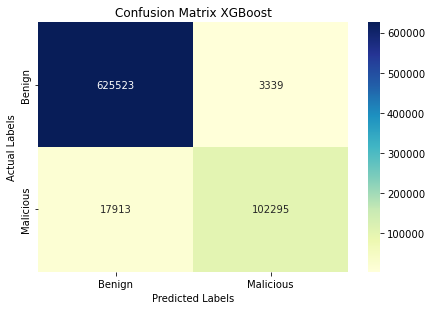

In [64]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_Xpred)
labels = ["Benign", "Malicious"]

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix XGBoost")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [65]:
start_time = time.time()
xgbclassifier.fit(x_train, y_train)
end_time = time.time()

In [66]:
print("Training time: ",end_time-start_time)

Training time:  81.22861194610596


In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_Apred = model.predict(x_test)

In [46]:
result_Ad=accuracy_score(y_Apred,y_test)
result_Ad

0.9958762198459423

In [47]:
print(classification_report(y_test, y_Apred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628862
           1       0.99      0.99      0.99    120208

    accuracy                           1.00    749070
   macro avg       0.99      0.99      0.99    749070
weighted avg       1.00      1.00      1.00    749070



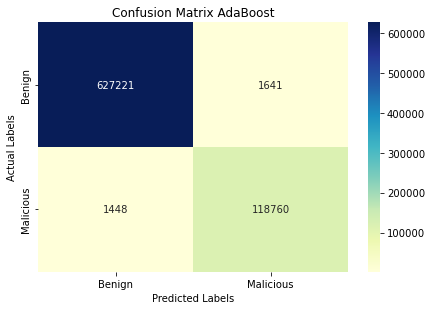

In [48]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_Apred)
labels = ["Benign", "Malicious"]

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix AdaBoost")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [49]:
start_time = time.time()
model.fit(x_train, y_train.values.ravel())
end_time = time.time()

In [50]:
print("Training time: ",end_time-start_time)

Training time:  361.9008300304413


In [51]:
from catboost import CatBoostClassifier

In [52]:
# Create adaboost classifer object
catc = CatBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
modelc = catc.fit(x_train, y_train)

#Predict the response for test dataset
y_cpred = modelc.predict(x_test)

0:	learn: 0.0520087	total: 615ms	remaining: 30.1s
1:	learn: 0.0238161	total: 1.03s	remaining: 24.8s
2:	learn: 0.0161574	total: 1.42s	remaining: 22.2s
3:	learn: 0.0097827	total: 1.78s	remaining: 20.4s
4:	learn: 0.0065995	total: 2.15s	remaining: 19.4s
5:	learn: 0.0059356	total: 2.52s	remaining: 18.4s
6:	learn: 0.0056110	total: 2.83s	remaining: 17.4s
7:	learn: 0.0044515	total: 3.22s	remaining: 16.9s
8:	learn: 0.0042705	total: 3.54s	remaining: 16.1s
9:	learn: 0.0040467	total: 3.88s	remaining: 15.5s
10:	learn: 0.0037734	total: 4.27s	remaining: 15.2s
11:	learn: 0.0034550	total: 4.61s	remaining: 14.6s
12:	learn: 0.0034399	total: 4.87s	remaining: 13.9s
13:	learn: 0.0032059	total: 5.25s	remaining: 13.5s
14:	learn: 0.0031607	total: 5.59s	remaining: 13s
15:	learn: 0.0031172	total: 5.94s	remaining: 12.6s
16:	learn: 0.0030559	total: 6.27s	remaining: 12.2s
17:	learn: 0.0028865	total: 6.63s	remaining: 11.8s
18:	learn: 0.0028128	total: 7s	remaining: 11.4s
19:	learn: 0.0027712	total: 7.36s	remaining: 1

In [53]:
print(classification_report(y_test, y_cpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628862
           1       1.00      1.00      1.00    120208

    accuracy                           1.00    749070
   macro avg       1.00      1.00      1.00    749070
weighted avg       1.00      1.00      1.00    749070



In [54]:
result_C=accuracy_score(y_cpred,y_test)
result_C

0.9993565354372755

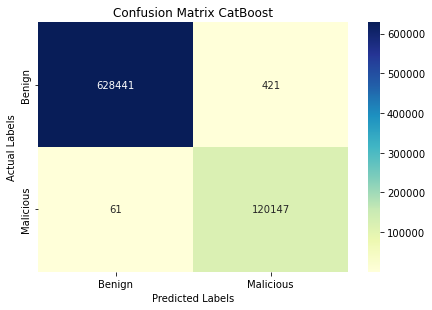

In [55]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_cpred)
labels = ["Benign", "Malicious"]

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix CatBoost")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [56]:
start_time = time.time()
modelc.fit(x_train, y_train.values.ravel())
end_time = time.time()

0:	learn: 0.0520087	total: 369ms	remaining: 18.1s
1:	learn: 0.0238161	total: 730ms	remaining: 17.5s
2:	learn: 0.0161574	total: 1.07s	remaining: 16.8s
3:	learn: 0.0097827	total: 1.42s	remaining: 16.3s
4:	learn: 0.0065995	total: 1.78s	remaining: 16.1s
5:	learn: 0.0059356	total: 2.15s	remaining: 15.8s
6:	learn: 0.0056110	total: 2.46s	remaining: 15.1s
7:	learn: 0.0044515	total: 2.83s	remaining: 14.9s
8:	learn: 0.0042705	total: 3.15s	remaining: 14.3s
9:	learn: 0.0040467	total: 3.48s	remaining: 13.9s
10:	learn: 0.0037734	total: 3.85s	remaining: 13.7s
11:	learn: 0.0034550	total: 4.17s	remaining: 13.2s
12:	learn: 0.0034399	total: 4.43s	remaining: 12.6s
13:	learn: 0.0032059	total: 4.8s	remaining: 12.3s
14:	learn: 0.0031607	total: 5.13s	remaining: 12s
15:	learn: 0.0031172	total: 5.46s	remaining: 11.6s
16:	learn: 0.0030559	total: 5.78s	remaining: 11.2s
17:	learn: 0.0028865	total: 6.13s	remaining: 10.9s
18:	learn: 0.0028128	total: 6.48s	remaining: 10.6s
19:	learn: 0.0027712	total: 6.82s	remaining:

In [57]:
print("Training time: ",end_time-start_time)

Training time:  19.091910362243652


In [47]:
first_model = {'Model': [ 'Decision Tree', 'RandomForest', 'XGboost', 'AdaBoost','CatBoost'],
               'accuracy' : [ score_dc, result_Rf, result_xg, result_Ad,result_C]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Decision Tree,0.998685
1,RandomForest,0.998913
2,XGboost,0.720489
3,AdaBoost,0.938599
4,CatBoost,0.999199
